<a href="https://colab.research.google.com/github/deepaktamil20/Mini_Projects/blob/main/Spark_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark.sql import SparkSession
import numpy as np

In [ ]:
#create instance of spark class 
spark=SparkSession.builder.appName('Questions').getOrCreate()

In [ ]:
spark

In [ ]:
emp = spark.read.csv('employee.csv',header='true', 
                      inferSchema='true')
emp.show(5)

+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id|salary|manager_id|emp_department_id|
+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+
|        100|    Steven|     King|steven.king@sqltu...|515.123.4567|1987-06-17|     4| 24000|      null|                9|
|        101|     Neena|  Kochhar|neena.kochhar@sql...|515.123.4568|1989-09-21|     5| 17000|       100|                9|
|        102|       Lex|   DeHaan|lex.dehaan@sqltut...|515.123.4569|1993-01-13|     5| 17000|       100|                9|
|        103| Alexander|   Hunold|alexander.hunold@...|590.423.4567|1990-01-03|     9|  9000|       102|                6|
|        104|     Bruce|    Ernst|bruce.ernst@sqltu...|590.423.4568|1991-05-21|     9|  6000|       103|                6|
+-----------+---

In [ ]:
dept = spark.read.csv('department.csv',header='true', 
                      inferSchema='true')
dept.show(5)

+-------------+---------------+---------------+
|department_id|department_name|dep_location_id|
+-------------+---------------+---------------+
|            1| Administration|           1700|
|            2|      Marketing|           1800|
|            3|     Purchasing|           1700|
|            4|Human Resources|           2400|
|            5|       Shipping|           1500|
+-------------+---------------+---------------+
only showing top 5 rows



In [ ]:
location = spark.read.csv('location.csv',header='true', 
                      inferSchema='true')
location.show(5)

+-----------+-------------------+-----------+-------------------+--------------+-------------------+
|location_id|     street_address|postal_code|               city|state_province|location_country_id|
+-----------+-------------------+-----------+-------------------+--------------+-------------------+
|       1400|2014 Jabberwocky Rd|      26192|          Southlake|         Texas|                 US|
|       1500|2011 Interiors Blvd|      99236|South San Francisco|    California|                 US|
|       1700|    2004 Charade Rd|      98199|            Seattle|    Washington|                 US|
|       1800|    147 Spadina Ave|    M5V 2L7|            Toronto|       Ontario|                 CA|
|       2400|     8204 Arthur St|       null|             London|          null|                 UK|
+-----------+-------------------+-----------+-------------------+--------------+-------------------+
only showing top 5 rows



In [ ]:
countries = spark.read.csv('country.csv',header='true', 
                      inferSchema='true')
countries.show(5)

+----------+------------+---------+
|country_id|country_name|region_id|
+----------+------------+---------+
|        AR|   Argentina|        2|
|        AU|   Australia|        3|
|        BE|     Belgium|        1|
|        BR|      Brazil|        2|
|        CA|      Canada|        2|
+----------+------------+---------+
only showing top 5 rows



**1. Get list of employess along with their department details**

In [ ]:
emp_dept =  emp.join(dept,emp["emp_department_id"] ==  dept["department_id"],"left")
emp_dept.show(5)

+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+-------------+---------------+---------------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id|salary|manager_id|emp_department_id|department_id|department_name|dep_location_id|
+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+-------------+---------------+---------------+
|        100|    Steven|     King|steven.king@sqltu...|515.123.4567|1987-06-17|     4| 24000|      null|                9|            9|      Executive|           1700|
|        101|     Neena|  Kochhar|neena.kochhar@sql...|515.123.4568|1989-09-21|     5| 17000|       100|                9|            9|      Executive|           1700|
|        102|       Lex|   DeHaan|lex.dehaan@sqltut...|515.123.4569|1993-01-13|     5| 17000|       100|                9|            9|      Executive|   

**2. Analysis Employee Department**

In [ ]:
emp_dept.groupBy('department_name').count().show()

+----------------+-----+
| department_name|count|
+----------------+-----+
|           Sales|    6|
|      Accounting|    2|
|         Finance|    6|
|Public Relations|    1|
|       Executive|    3|
|      Purchasing|    6|
|       Marketing|    2|
|              IT|    5|
|  Administration|    1|
|        Shipping|    7|
| Human Resources|    1|
+----------------+-----+



In [ ]:
department_count = emp_dept.select('department_name').toPandas()
department_count.head()

,department_name
0,Executive
1,Executive
2,Executive
3,IT
4,IT


In [ ]:
# Creating a function to make a countplot

def plot_categorical(feature , dataset):
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of ' + feature)
    plt.xlabel('target')

    total = len(dataset[feature])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))

    plt.show()

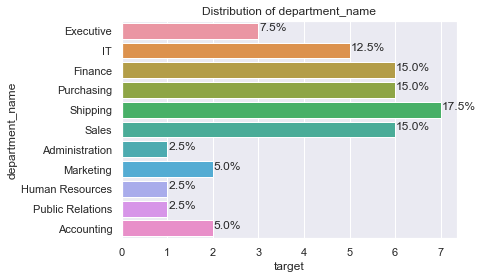

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plot_categorical('department_name',department_count)

**Conclusion**

* Majority of employess(around 17.5%) work in Shipping Department
* Administration, Human Resources and Public Relations are Departments having least number of Employees working
* Finance, Sales and Purchasing departments have equal percentage of employees employeed 

**3. Get Address of Administration and Marketing Department**

In [ ]:
department_locations = dept.join(location,dept["dep_location_id"] ==  location["location_id"],"left")

In [ ]:
countries_department_locations = department_locations.join(countries,department_locations["location_country_id"] ==  countries["country_id"],"left")
countries_department_locations.show(1)

+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
|department_id|department_name|dep_location_id|location_id| street_address|postal_code|   city|state_province|location_country_id|country_id|        country_name|region_id|
+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
|            1| Administration|           1700|       1700|2004 Charade Rd|      98199|Seattle|    Washington|                 US|        US|United States of ...|        2|
+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
only showing top 1 row



**4. Get Employees who work in USA as Administration department**

In [ ]:
employees_department_locations = emp.join(countries_department_locations,emp["emp_department_id"] ==  countries_department_locations["department_id"],"left")
employees_department_locations.show(1)

+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id|salary|manager_id|emp_department_id|department_id|department_name|dep_location_id|location_id| street_address|postal_code|   city|state_province|location_country_id|country_id|        country_name|region_id|
+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
|        200|  Jennifer|   Whalen|jennifer.whalen@s...|515.123.4444|1987-09-17|     3|  4400|       101|              

In [ ]:
employees_department_locations.filter( (employees_department_locations.country_id  == "US") & (employees_department_locations.department_name  == "Administration") ).show()  

+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id|salary|manager_id|emp_department_id|department_id|department_name|dep_location_id|location_id| street_address|postal_code|   city|state_province|location_country_id|country_id|        country_name|region_id|
+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-----------------+-------------+---------------+---------------+-----------+---------------+-----------+-------+--------------+-------------------+----------+--------------------+---------+
|        200|  Jennifer|   Whalen|jennifer.whalen@s...|515.123.4444|1987-09-17|     3|  4400|       101|              

**5. How many employees work in Canada ?**

In [ ]:
rdd_1 = employees_department_locations.rdd
rdd_1.collect()[0]

Row(employee_id=200, first_name='Jennifer', last_name='Whalen', email='jennifer.whalen@sqltutorial.org', phone_number='515.123.4444', hire_date='1987-09-17', job_id=3, salary=4400, manager_id=101, emp_department_id=1, department_id=1, department_name='Administration', dep_location_id=1700, location_id=1700, street_address='2004 Charade Rd', postal_code='98199', city='Seattle', state_province='Washington', location_country_id='US', country_id='US', country_name='United States of America', region_id=2)

In [ ]:
employees_department_locations.groupBy('country_name').count().show()

+--------------------+-----+
|        country_name|count|
+--------------------+-----+
|             Germany|    1|
|United States of ...|   30|
|              Canada|    2|
|      United Kingdom|    7|
+--------------------+-----+



**Only two people works in canada**

**6. Get Complete Address of Employees**

In [ ]:
employees_department_locations.printSchema()

root
 |-- employee_id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- phone_number: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- job_id: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- manager_id: integer (nullable = true)
 |-- emp_department_id: integer (nullable = true)
 |-- department_id: integer (nullable = true)
 |-- department_name: string (nullable = true)
 |-- dep_location_id: integer (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- street_address: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state_province: string (nullable = true)
 |-- location_country_id: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- region_id: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import concat , col , lit
employees_department_locations.withColumn("Address",concat(col("street_address"), lit(","), col("city"), lit(","), col("postal_code"), lit(","), col("state_province") , lit(","), col("country_name"))).select('Address').show()

+--------------------+
|             Address|
+--------------------+
|2004 Charade Rd,S...|
|2014 Jabberwocky ...|
|2014 Jabberwocky ...|
|2014 Jabberwocky ...|
|2014 Jabberwocky ...|
|2014 Jabberwocky ...|
|2004 Charade Rd,S...|
|2004 Charade Rd,S...|
|2004 Charade Rd,S...|
|2004 Charade Rd,S...|
|2004 Charade Rd,S...|
|2004 Charade Rd,S...|
|2011 Interiors Bl...|
|2011 Interiors Bl...|
|2011 Interiors Bl...|
|2011 Interiors Bl...|
|2011 Interiors Bl...|
|2011 Interiors Bl...|
|2011 Interiors Bl...|
|2004 Charade Rd,S...|
+--------------------+
only showing top 20 rows



**7. Convert Employee's First name and last name to lower case letters and concatinate them**

In [ ]:
def convertCase(string):
    return string.lower()

In [ ]:
from pyspark.sql.functions import udf , StringType
convertUDF = udf(lambda z: convertCase(z),StringType())

In [ ]:
emp.select(convertUDF(col("first_name")).alias("first_name"), convertUDF(col("last_name")).alias("last_name") ).withColumn("Name",concat(col("first_name"), lit(" "), col("last_name"))).select('Name').show()

+----------------+
|            Name|
+----------------+
|     steven king|
|   neena kochhar|
|      lex dehaan|
|alexander hunold|
|     bruce ernst|
|    david austin|
| valli pataballa|
|   diana lorentz|
| nancy greenberg|
|   daniel faviet|
|       john chen|
|  ismael sciarra|
|josemanuel urman|
|       luis popp|
|    den raphaely|
|  alexander khoo|
|    shelli baida|
|    sigal tobias|
|      guy himuro|
|karen colmenares|
+----------------+
only showing top 20 rows



**8. Get Hightest paid jobs**

In [ ]:
from pyspark.sql.functions import max
employees_department_locations.select(max('salary')).collect()[0][0]

24000

In [ ]:
data = employees_department_locations.select('*')

In [ ]:
from pyspark.sql import SQLContext
data.registerTempTable("data")
sql_context = SQLContext(spark)
sql_context.sql(f"SELECT department_name from data WHERE salary == {employees_department_locations.select(max('salary')).collect()[0][0]}").collect()[0][0]

'Executive'

Hightest paid job is Executive